In [23]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
file = 'Todos_feminicidios.csv'

df = pd.read_csv(file)

In [25]:
df

DATE  Feminicidios
0    1/1/2015            32
1    2/1/2015            30
2    3/1/2015            31
3    4/1/2015            35
4    5/1/2015            28
..        ...           ...
91   8/1/2022            74
92   9/1/2022            80
93  10/1/2022            86
94  11/1/2022            76
95  12/1/2022            77

[96 rows x 2 columns]

In [26]:
df.head()

DATE  Feminicidios
0  1/1/2015            32
1  2/1/2015            30
2  3/1/2015            31
3  4/1/2015            35
4  5/1/2015            28

In [27]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y', errors='coerce')
df.dtypes

DATE            datetime64[ns]
Feminicidios             int64
dtype: object

In [28]:
df = df.rename(columns={'DATE': 'ds',
                        'Feminicidios': 'y'})

df.head()

ds   y
0 2015-01-01  32
1 2015-02-01  30
2 2015-03-01  31
3 2015-04-01  35
4 2015-05-01  28

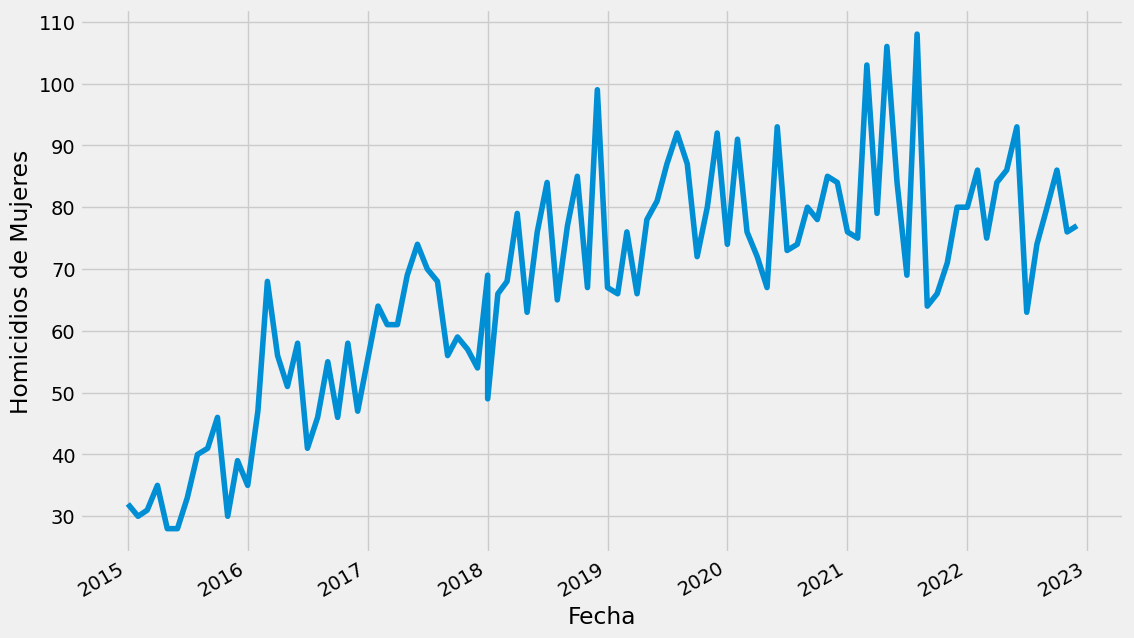

In [29]:
ax = df.set_index('ds').plot(figsize=(12, 8), legend=False)
ax.set_ylabel('Homicidios de Mujeres')
ax.set_xlabel('Fecha')

plt.savefig('Feminicidios_2015-2022.png', dpi=1000, bbox_inches='tight')

In [30]:
my_model = Prophet(interval_width=0.95)

In [31]:
df.dropna(inplace=True)
df['y'].dropna(inplace=True)

In [32]:
df

ds   y
0  2015-01-01  32
1  2015-02-01  30
2  2015-03-01  31
3  2015-04-01  35
4  2015-05-01  28
..        ...  ..
91 2022-08-01  74
92 2022-09-01  80
93 2022-10-01  86
94 2022-11-01  76
95 2022-12-01  77

[96 rows x 2 columns]

In [33]:
my_model.fit(df)


01:38:41 - cmdstanpy - INFO - Chain [1] start processing


01:38:41 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

ds
0 2015-01-01
1 2015-02-01
2 2015-03-01
3 2015-04-01
4 2015-05-01

In [35]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2015-01-01  28.273592   11.243511   45.792418
1 2015-02-01  36.750007   20.679500   53.679970
2 2015-03-01  35.963130   19.110101   52.827842
3 2015-04-01  38.639447   21.411107   54.985593
4 2015-05-01  39.899244   23.210824   56.042011

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



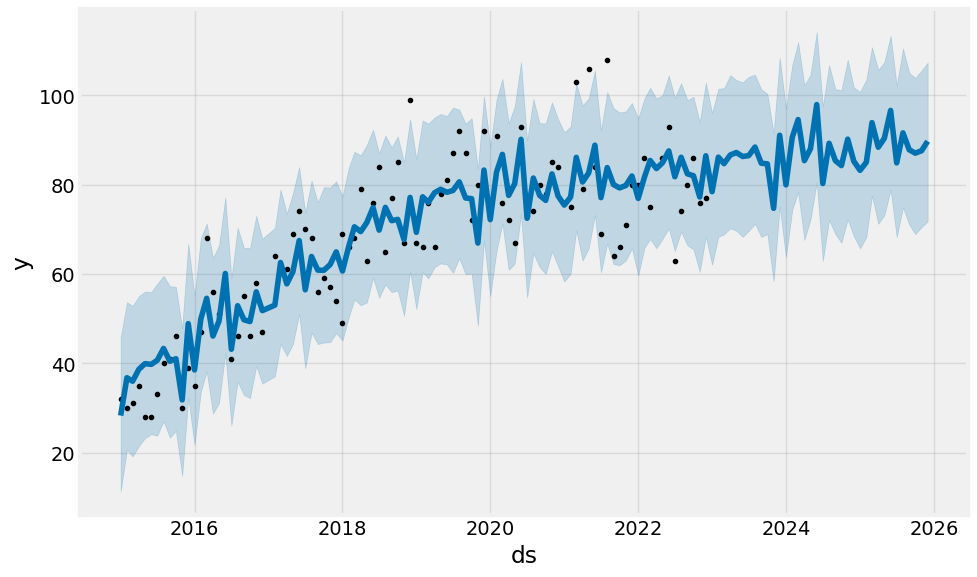

In [36]:
my_model.plot(forecast, uncertainty=True)
plt.savefig('Feminicidiosconpredicción_2015-2022.png', dpi=1000, bbox_inches='tight')

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

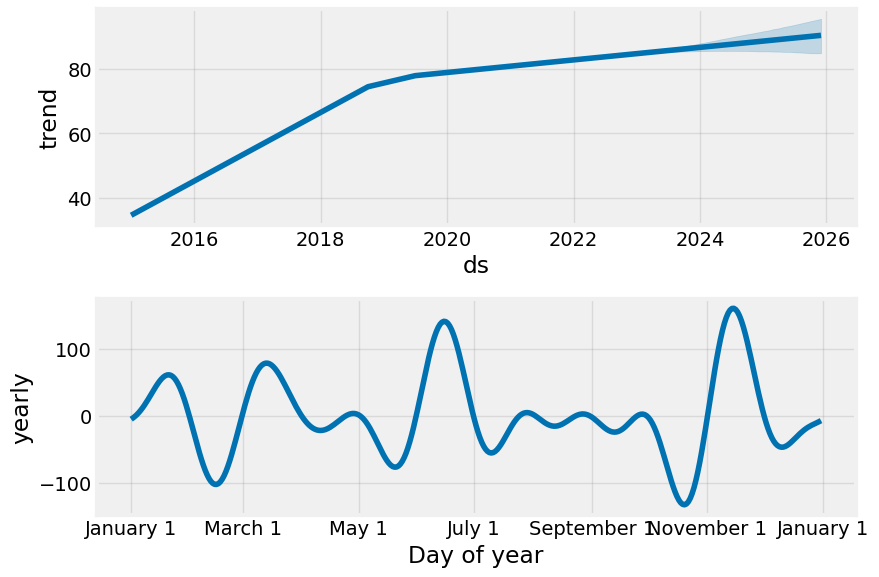

In [37]:
my_model.plot_components(forecast)
plt.savefig('Feminicidiostrend_2015-2022.png', dpi=1000, bbox_inches='tight')

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

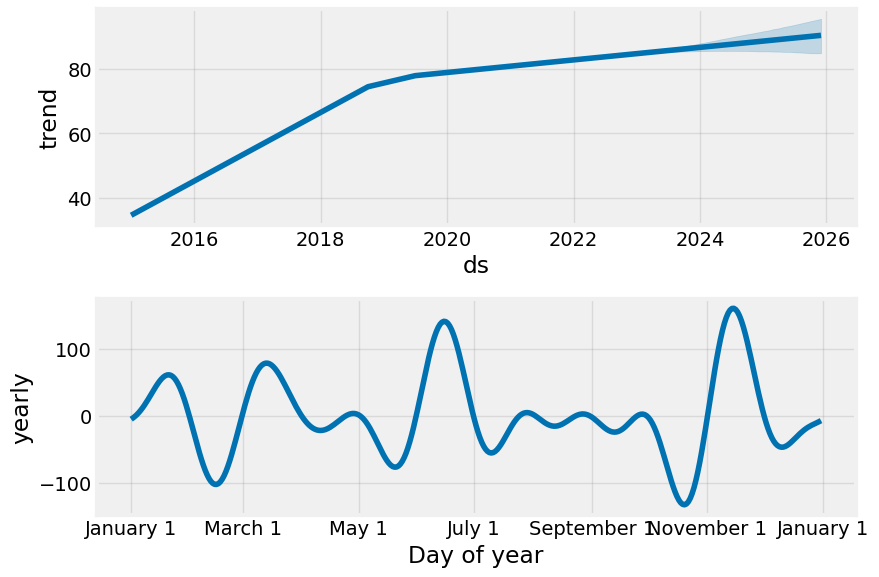

In [38]:
fig1 = my_model.plot_components(forecast)


c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



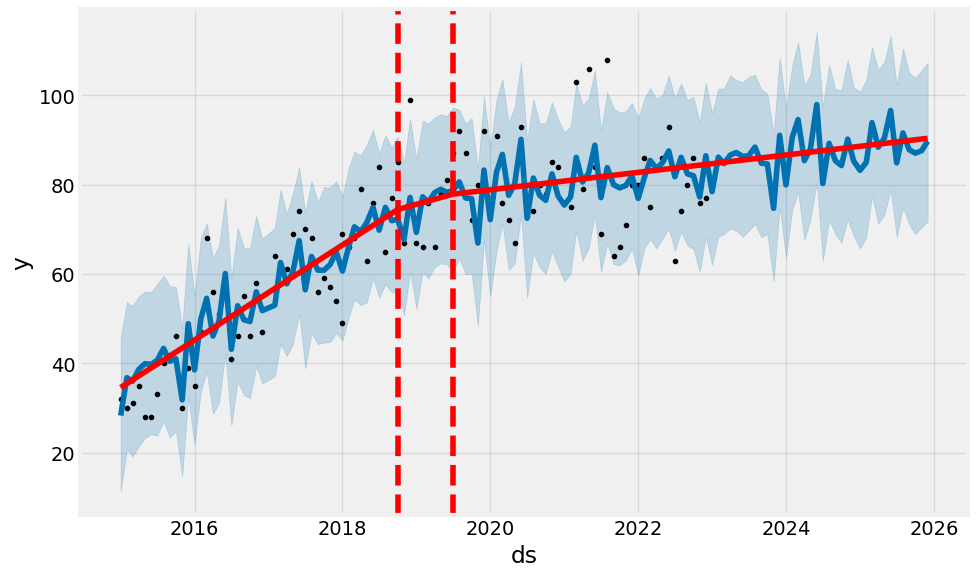

In [39]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)
plt.savefig('Feminicidiostrendycambiosgrandes_2015-2022.png', dpi=1000, bbox_inches='tight')

In [40]:
my_model.changepoints


3    2015-04-01
6    2015-07-01
9    2015-10-01
12   2016-01-01
15   2016-04-01
18   2016-07-01
21   2016-10-01
24   2017-02-01
27   2017-05-01
30   2017-08-01
33   2017-11-01
36   2018-01-01
39   2018-04-01
42   2018-07-01
45   2018-10-01
48   2019-01-01
51   2019-04-01
54   2019-07-01
57   2019-10-01
60   2020-01-01
63   2020-04-01
66   2020-07-01
69   2020-10-01
72   2021-01-01
75   2021-04-01
Name: ds, dtype: datetime64[ns]

01:38:50 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



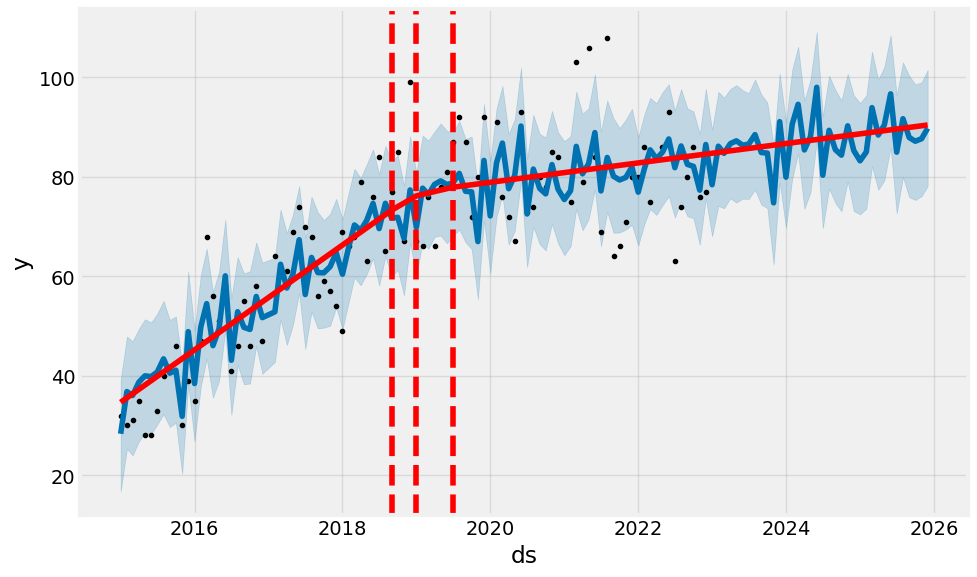

In [41]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

01:38:51 - cmdstanpy - INFO - Chain [1] start processing
01:38:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



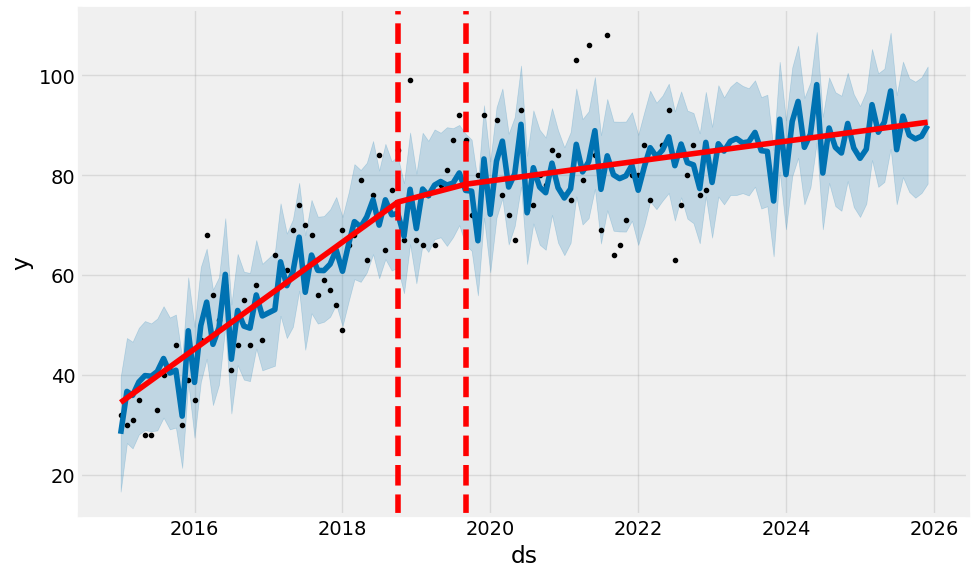

In [42]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

01:38:51 - cmdstanpy - INFO - Chain [1] start processing
01:38:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



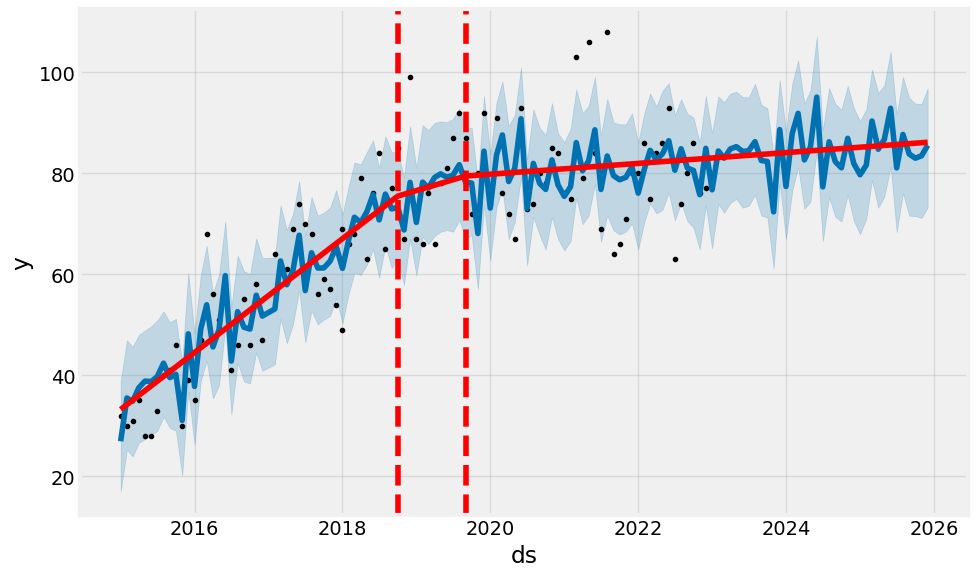

In [43]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

01:38:52 - cmdstanpy - INFO - Chain [1] start processing
01:38:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



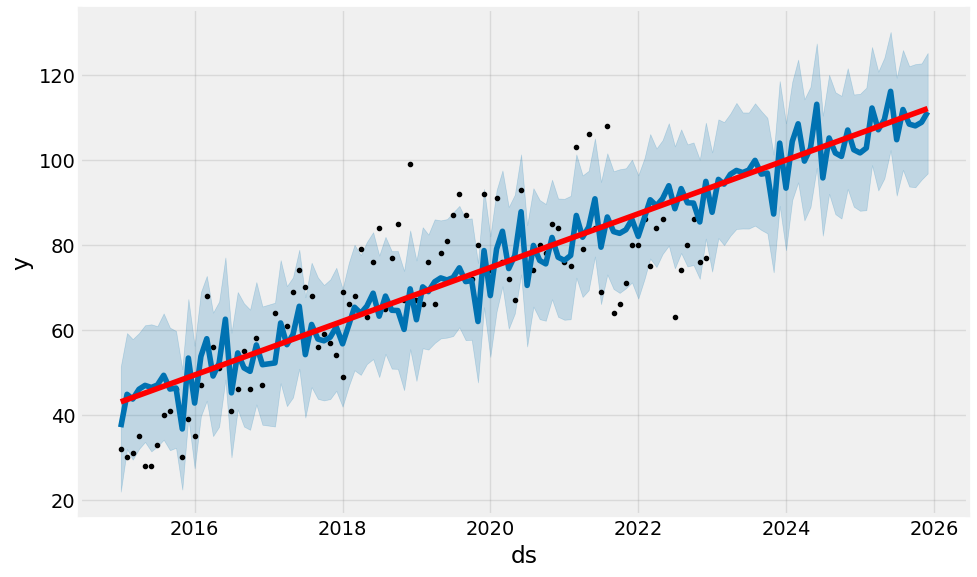

In [44]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
plt.savefig('Feminicidioslinearecta_2015-2022.png', dpi=1000, bbox_inches='tight')

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\luisg\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



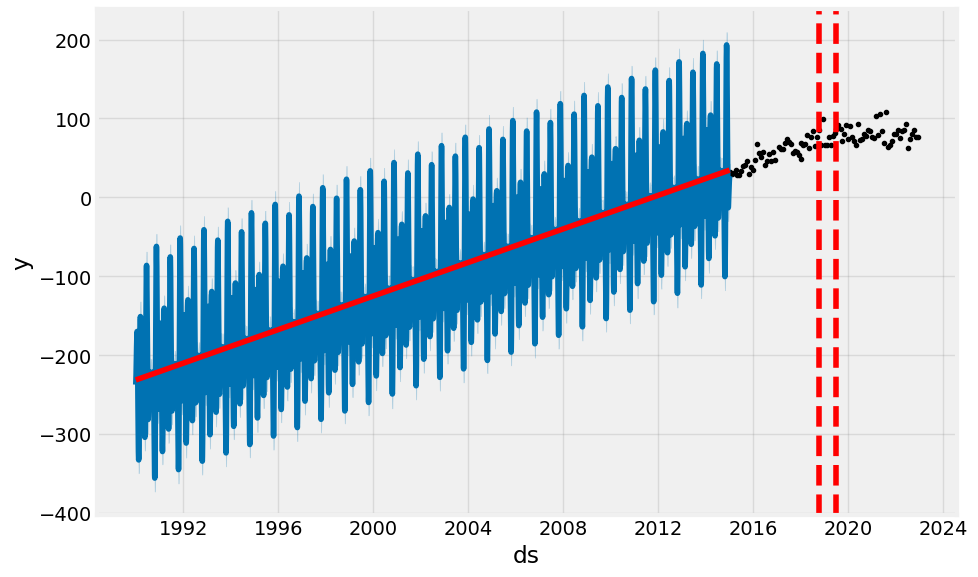

In [53]:
df2=pd.read_csv('1990-2014.csv')
forecast2 = my_model.predict(df2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
fig = my_model.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast2)
plt.savefig('Feminicidiosconpredicción_1990-2014.png', dpi=1000, bbox_inches='tight')

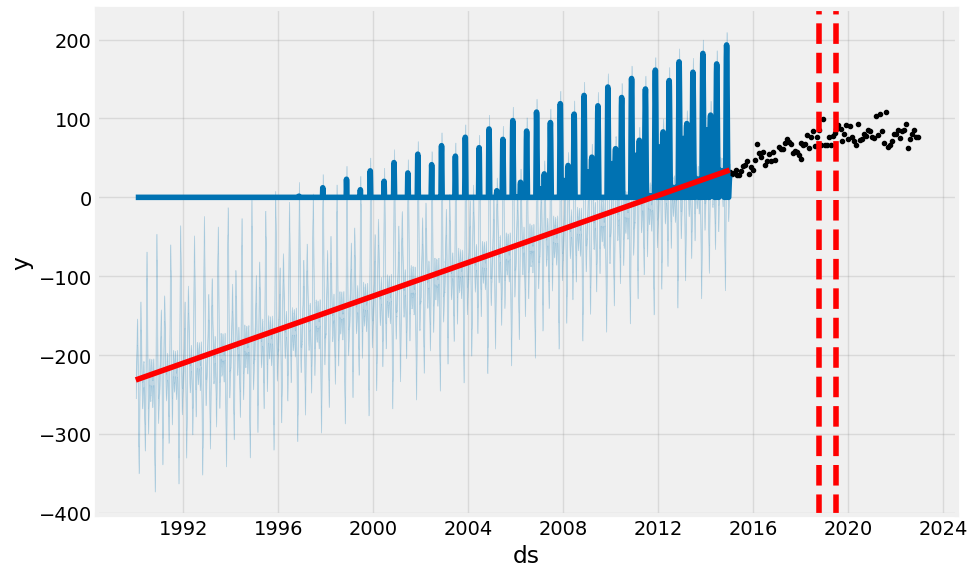

In [58]:
forecast2['yhat'] = forecast2['yhat'].apply(lambda x: max(0, x))
fig = my_model.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast2)
plt.savefig('Feminicidiosconpredicción_1990-2014restringido.png', dpi=1000, bbox_inches='tight')